# `train_test_split()`

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import data, take `TAX`, `CRIM`, and `PTRATIO` and assign to `X`. Assign target to `y`.

In [2]:
data = load_boston()

print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
boston = pd.DataFrame(data.data, columns=data.feature_names)
X = boston[['TAX', 'CRIM', 'PTRATIO']].copy()
boston_y = pd.DataFrame(data.target)

print(X.head())
print(boston_y.head())

     TAX     CRIM  PTRATIO
0  296.0  0.00632     15.3
1  242.0  0.02731     17.8
2  242.0  0.02729     17.8
3  222.0  0.03237     18.7
4  222.0  0.06905     18.7
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


Create `X_train, X_test, y_train, y_test` using train-test split with a 33% holdout

In [5]:
X_train, X_test, y_train, y_test = train_test_split(boston, boston_y, test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339, 1) (167, 1)


Fit a linear regression to the **training** set (`X_train` and `y_train`) and look at the $R^2$ score **on the training set**

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.770182366337


Why is the $R^2$ using the **training set** misleading?

**Without refitting the data**, look at the $R^2$ score on the **test set** (`X_test` and `y_test`)

In [9]:
print(lr.score(X_test, y_test))

0.653450237186


Why is this a more accurate measure of how well our linear regression of `TAX`, `CRIM`, and `PTRATIO` on `MDEV`? 

## Try it out!

Import the `datasets/salary.csv` dataset. This dataset records the salary of academics and measures the following features:

- sx = Sex, coded 1 for female and 0 for male
- rk = Rank, coded
  - 1 for assistant professor,
  - 2 for associate professor, and
  - 3 for full professor
- yr = Number of years in current rank
- dg = Highest degree, coded 1 if doctorate, 0 if masters
- yd = Number of years since highest degree was earned
- sl = Academic year salary, in dollars.

Import the salary data, assign the `yr` and `yd` columns to a variable named `X`, then assign `sl` to a variable named `y`

In [17]:
#from sklearn.datasets import salary

salary=pd.read_csv('datasets/salary.csv')
X=salary[['yr','yd']].copy()

In [19]:
y=salary[['sl']].copy()

Use `train_test_split()` to create a training set and a test set, split 50/50

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 2) (26, 2) (26, 1) (26, 1)


Train a linear regression using the training set. What does the $R^2$ look like for the training set? What does the $R^2$ look like for the test set? Which is higher? Which is a more accurate number? Why?

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.420410699118


In [23]:
print(lr.score(X_test, y_test))

0.699331046667


# `cross_val_score()` and `cross_val_predict()`

Let's use `cross_val_score()` and `cross_val_predict()` to do cross-validation and to take a quick look at each fold.

Using the boston data, let's pick `CRIM`, `ZN`, and `INDUS` for our predictors and assign them to `X`

In [24]:
X = boston[['CRIM', 'ZN', 'INDUS']].copy()
print(X.head())
print(boston_y.head())

      CRIM    ZN  INDUS
0  0.00632  18.0   2.31
1  0.02731   0.0   7.07
2  0.02729   0.0   7.07
3  0.03237   0.0   2.18
4  0.06905   0.0   2.18
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


Use `cross_val_score()` and five-fold cross-validation to see the $R^2$ for each of the folds compared to the test set for that fold:

In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict

lr = LinearRegression()

print(cross_val_score(lr, X, boston_y, cv=5))
#cross_val_score(lr, X, boston_y, cv=5)
#cross_val_score(modeltype, x, y, cv=number of folds))

[-0.27506897  0.15798987 -0.28479877  0.03225963 -0.00700344]


What do the low $R^2$ scores mean? If they were there, what does a **negative** $R^2$ show?

We may also want to see an overall score for these folds. Typically, we will take the average $R^2$ across each fold:

In [28]:
scores = cross_val_score(lr, X, boston_y, cv=5)
print(scores.mean(),scores.std())

-0.0753243358482 0.175758376411


Use `cross_val_predict()` and assign the predicted values for each test fold to an object called `predictions`. How many predictions should we have in total?

In [29]:
predictions = cross_val_predict(lr, X, boston_y, cv=5)

`cross_val_predict()` lets us use the predictions from each fold to look at metrics that are important but not part of `LinearRegression()`'s `.score()` method, such as the mean squared error. The mean squared error is the average difference between the true y and the predicted y:

$$ \text{Mean Squared Error} = \frac{\sum(y_i - \hat{y}_i)^2}{n} $$

We will import sklearn's `mean_squared_error()` function which takes in a true y and a predicted y and outputs the MSE

In [31]:
from sklearn.metrics import mean_squared_error

mean_squared_error(boston_y, predictions)

67.002796886508037

## Try it out!

Using the Boston housing data above, try a different set of columns -- does the $R^2$ on the folds shown by `cross_val_score()` improve? What about the MSE using the predictions output by `cross_val_predict()`?

# `KFold`

Sklearn also lets us manually create folds, which we can then call other options on. This is helpful if we want to do more advanced work on each of those folds. 

In the following example, we will fit a linear regression using every column in the Boston housing data and validating its efficacy using 5-fold cross-validation. For each fold, I will calculate the $R^2$ and the MSE -- this would be difficult to do without using `KFolds` to manually split up the data.

For ease of indexing, I am converting `X` into a `numpy` array using the `.values` attribute

In [34]:
from sklearn.model_selection import KFold

In [35]:
X = boston.copy().values
boston_y = boston_y.values

print(X.shape, boston_y.shape)

(506, 13) (506, 1)


Instantiate a `KFold` object with 5 folds

In [36]:
kfolds = KFold(5)

`KFold` will take in one or two data collections and return back a set of paired indices for the folds in question:

In [37]:
for training_index, test_index in kfolds.split(X, boston_y):
    print('training: ', training_index[0:5], '...', training_index[-6:-1], 
          '\ntest: ', test_index[0:5], '...', test_index[-6:-1], '\n')

training:  [102 103 104 105 106] ... [500 501 502 503 504] 
test:  [0 1 2 3 4] ... [ 96  97  98  99 100] 

training:  [0 1 2 3 4] ... [500 501 502 503 504] 
test:  [102 103 104 105 106] ... [197 198 199 200 201] 

training:  [0 1 2 3 4] ... [500 501 502 503 504] 
test:  [203 204 205 206 207] ... [298 299 300 301 302] 

training:  [0 1 2 3 4] ... [500 501 502 503 504] 
test:  [304 305 306 307 308] ... [399 400 401 402 403] 

training:  [0 1 2 3 4] ... [399 400 401 402 403] 
test:  [405 406 407 408 409] ... [500 501 502 503 504] 



We will use these indices to manually split up `X` and `boston_y`:

In [38]:
counter = 0
for training_index, test_index in kfolds.split(X, boston_y):
    x_train = X[training_index]
    x_test = X[test_index]
    y_train = boston_y[training_index]
    y_test = boston_y[test_index]
    print('fold', counter, '-', x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    counter += 1 

fold 0 - (404, 13) (102, 13) (404, 1) (102, 1)
fold 1 - (405, 13) (101, 13) (405, 1) (101, 1)
fold 2 - (405, 13) (101, 13) (405, 1) (101, 1)
fold 3 - (405, 13) (101, 13) (405, 1) (101, 1)
fold 4 - (405, 13) (101, 13) (405, 1) (101, 1)


We then feed these folds into `LinearRegression()` to fit it to a given fold and then use `.score()` and `mean_squared_error()` to look at the fit on the test set in each fold:

In [39]:
counter = 0
lr = LinearRegression()
for training_index, test_index in kfolds.split(X, boston_y):
    x_train = X[training_index]
    x_test = X[test_index]
    y_train = boston_y[training_index]
    y_test = boston_y[test_index]
    lr.fit(x_train, y_train)
    r2_score = lr.score(x_test, y_test)
    fold_predictions = lr.predict(x_test)
    mse_score = mean_squared_error(y_test, fold_predictions)
    print('Fold', counter, '- r^2 score:', r2_score, 'mse:', mse_score)
    counter += 1

Fold 0 - r^2 score: 0.638610693529 mse: 12.4806502123
Fold 1 - r^2 score: 0.713344317153 mse: 26.0962026697
Fold 2 - r^2 score: 0.586451336256 mse: 33.1199558727
Fold 3 - r^2 score: 0.0784249546783 mse: 80.8330537787
Fold 4 - r^2 score: -0.263124546955 mse: 33.5843556523


Fold 0 - r^2 score: 0.638610693529 mse: 12.4806502123


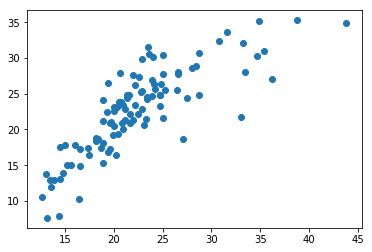

Fold 1 - r^2 score: 0.713344317153 mse: 26.0962026697


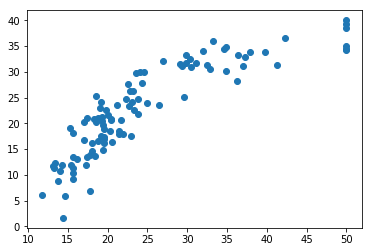

Fold 2 - r^2 score: 0.586451336256 mse: 33.1199558727


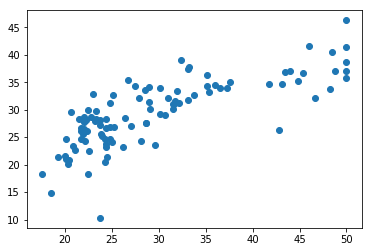

Fold 3 - r^2 score: 0.0784249546783 mse: 80.8330537787


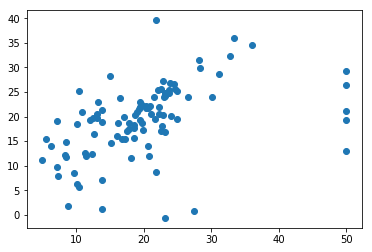

Fold 4 - r^2 score: -0.263124546955 mse: 33.5843556523


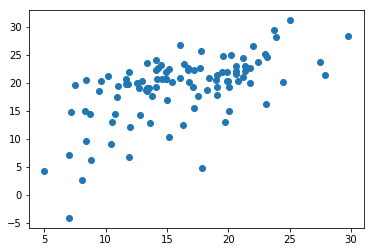

In [40]:
counter = 0
lr = LinearRegression()
for training_index, test_index in kfolds.split(X, boston_y):
    x_train = X[training_index]
    x_test = X[test_index]
    y_train = boston_y[training_index]
    y_test = boston_y[test_index]
    lr.fit(x_train, y_train)
    r2_score = lr.score(x_test, y_test)
    fold_predictions = lr.predict(x_test)
    mse_score = mean_squared_error(y_test, fold_predictions)
    plt.scatter(y_test,fold_predictions)
    print('Fold', counter, '- r^2 score:', r2_score, 'mse:', mse_score)
    plt.show()
    counter += 1

By using `KFold` we are able to access the folds _as they are created_ and can learn more about how well each fold does using different statistics. 

**Discussion Questions**:

1. Why might we want to look at different goodness of fit metrics during the cross-validation process?
2. It looks like our $R^2$ changes pretty frequently but our `mse` is not particularly volatile in this process. Have we made a good modeling choice by including every column in Boston? Why or why not? 